# Testing hypotheses: Null vs. Alt.

We will now be more formal about some of the basic hypothesis testing ideas we established above.  Before we do that, we will load up the usual Python code we will need for the examples below.

In [1]:
import numpy as np
import matplotlib.pyplot as plots 
import pandas as pd

## Swain Recap
Here again is the 100,000 simulation version of the Swain case.

:::{figure-md} Swain_100k_again
:class: myclass

<img src="images/Swain_100k.png" alt="Swain_100k" class="bg-white mb-1" width="500px">

100,000 draws of 100 people from the Swain case
:::

To reiterate, the distribution in blue is what the "random" model says are the possible outcomes---in terms of counts of Black jurors. This essentially never overlapped with Swain's actual outcome, so we said we have evidence to "reject" the hypothesis of random selection.  And we have evidence consistent with an "alternative" hypothesis of discrimination.

## The Null Hypothesis
The null hypothesis, sometimes written $H_0$, can be thought of as the *skeptical* position on the possibility of a given relationship (in the population).  The **null hypothesis**, often referred to as the "null", claims that

> any relationship we observed in the sample was simply a matter of chance in terms of the particular sample we saw. This relationship *does not exist* in the population.

In the case of Swain, the null hypothesis is the hypothesis under which we generated the simulations: it is contention that juries are randomly drawn from the population (in proportion to the number of Black and non-Black people living in the county), and any seeming divergence from that randomness in Swain's case was due to *chance alone*.

If we do not find much evidence against the null hypothesis, we will **fail to reject the null hypothesis**.  In Swain's case, the Supreme Court felt they could not reject the null.

## The Alternative Hypothesis
Clearly, Swain and his lawyers felt they could reject the null, though of course they did not use those terms.  They were arguing that the evidence was consistent with the **alternative hypothesis**, written $H_1$ ("aitch one") or $H_A$. More formally, the alternative hypothesis says that 

> something systematic, other than chance, made the data differ from what we would expect under the null hypothesis.  That is, there is a real difference or real relationship between the variables, and that this is true in the population.  

Typically, the alternative hypothesis is our hypothesis of interest, and the one we have a theory about.  Occasionally however, studies will argue that the null hypothesis is more interesting: e.g. studies that show there is no difference on medical outcomes between groups who take or do not take homeopathic treatments for ailments.  

For Swain, the alternative hypothesis is that 8 (or fewer) Black people on the jury panel could not plausibly have occurred by chance for his "sample", and instead reflects something systematic in the population. That is, it reflects a true bias in jury selection. 

## Decisions

A hypothesis test involves one decision, and there are two options.  We **either**

1. **reject the null hypothesis**, meaning we think the world is consistent with the alternative hypothesis

**or**

2. **fail to reject the null hypothesis**, meaning we think the world is consistent with the null model.

There are no other options: we are never not able to make a decision, nor can we say "both".

One immediate observation is that this logic is all *with respect to the null hypothesis*.  There are various reasons for this, and one way to think about it is that we "privilege"  the null insofar as we are generally skeptical that what we are seeing is anything other than chance.  

Notice too that we don't talk of "confirming the alternative hypothesis" or similar language, even if we reject the null. This is because, technically, rejecting the null is not evidence that our *particular* alternative hypothesis story *must* be true.  Put differently, there are lots of alternative hypotheses consistent with the rejection of this one null hypothesis.  

## Test Statistics

For a hypothesis test, we need a summary of the data we saw that tells us how far it was from what would expect under the null hypothesis.  This is the task of something we call a **test statistic**,

> it is a value we calculate that tells us the relative plausibility of the null vs the alternative hypothesis

This course will not spend a great deal of time on the theory behind test statistics.  But in general, we try to find ways to summarize our data such that *large, absolute* values suggest that $H_A$ is more plausible than $H_0$.  Recall that the **absolute value** of some number $x$

> is the magnitude of that number, regardless of its sign, and is written $|x|$. That is, without regard to its sign.  So if $x$ is negative, we simply remove the minus sign; if it positive (non negative), we leave it as is.

### Testing Procedure
Once we have decided on what our test statistic will be, we take the following steps: 

1. based on the set up of the experiment, we will *simulate* the test statistic many times.
2. we compare the *simulated* test statistic from (1), with the actual *observed statistic* from the experiment itself
3. then we make our decision about whether the evidence suggests we should reject the null, or fail to reject the null.

In practice, the observed statistic (and thus the test statistic) might be a difference or an average.  We now give some examples to make this clearer.

## One Sample Test: Life Expectancy in NYC

To see how some of our test machinery works, we will do a one sample (mean) test.  The general idea is that we have an average (specifically, a mean) of a sample and we want to compare it to some specified value.  We want to learn whether the average of our sample of interest is different (or not) from that other pre-specified mean; actually, we will start out just trying to ascertain if the mean is *lower* than another mean ("is different" is more general, and we will return to it). 

Our example is of life expectancies, in years, for various parts of Manhattan.  The actual data are not real, but are close to the real values.  Consider the table below, and suppose it is drawn from random samples of death certificates in the various districts.  

|  Neighborhood | Midtown  | Greenwich Village| FiDi |Stuy Town   |
|---|---|---|---|---|
|  Average life expectancy | 85.09 |86.52| 86.00| 85.67  |
|  Sample size             | 36    |30 | 24 | 31 |

Our interest is in the life expectancy in Midtown: at 85.09 years, it is shorter than the other districts.  But that might have been just due to having an unusual (random) sample---we only had $n=36$, after all, and perhaps we just got "unlucky" when we sampled those certificates, that day, in Midtown.

To tackle this problem, we will first assume that all the districts together constitute some *population* of interest---say, "Manhattan." This obviously is not true---there are many other districts---but it doesn't affect the main logic of what we will do in terms of hypothesis testing. That hypothesis test will boil down to asking whether the Midtown mean is "unusual" or "special" relative to the mean of the districts as a whole---specifically, that it is unusually *low*.

More formally, our question is: 

> is the average life expectancy that we recorded  from the $n=36$ sample for Midtown *less than* what we would have recorded had we just taken a random sample of $n=36$ from the population as a whole?  

In terms of hypotheses: 
- our **null** hypothesis is that the answer is "no".  That is, there is nothing special about Midtown, and it does not differ relative to the other districts by anything more than chance sampling. The life expectancy there is not lower.
- our **alternative** hypothesis is that the answer is "yes".  That is, there is something *different* about Midtown.  Beyond just chance sampling, it differs systematically from the other districts, and specifically it has *lower* life expectancies.  

To return to the language above, this is a "one sample test" insofar as we have the mean of a specific sample (here, Midtown) and we want to know whether that mean differs from (actually, is lower than) a particular value (here, the mean of Manhattan).

In other courses, you might do a (one-sample) $t$-test at this point.  But here we will do something different:
1. First, recall that the null hypothesis is that our Midtown sample mean is not lower than the mean we would have seen had we generated a sample from Manhattan as a whole.  
2. In that case, let's just draw a sample of $n=36$ from our total Manhattan sample of 121 death certificates $(36 + 30 + 24 +31 =121)$.  Then take the mean of that random sample.  This is our *test statistic*.
3. We want the *distribution* of that test statistic---all the different values it could take---so we can see how plausible our *observed (test) statistic* (the mean of Midtown) is.  To get that distribution, pull many repeated samples of size 36, and record the mean.  
4. We will plot that distribution of hypothetical means, and then see how close or far away our Midtown mean is relative to that distribution.    

Let's work through some code on this.

### Simulations for life expectancy
First, we will load the relevant 'health' data, and take the mean by `district`

In [10]:
health = pd.read_csv('data/nyc_health.csv')
district_averages = health.groupby('district').mean()

Let's double check this data accords with our table above, at least in terms of sample size: 

In [11]:
health.groupby('district').count()

life_expect
district                       
financial_district           24
greenwich_village            30
midtown                      36
stuy_town                    31

Next, we need to sample, repeatedly, from the `life_expect` column.  We will do this by dropping the district label on our data, and then writing a function to do repeated draws from the data.

In [4]:
health_only = health.drop(columns=['district'])
def random_sample_average():
    random_sample = health_only.sample(36, replace=False)
    return np.average(random_sample['life_expect'])

This function will `.sample` 36 units from the life expectancy data.  And then it will take the average of those life expectancies via `np.average`. We will call that function momentarily, but first we need an array ready to take all those averages:

In [5]:
sample_averages = ([]) 

Let's call the function a large number (say, 10000) times.  Each time, we will calculate the mean and `append` it (so, stick it on the end) of the array.  That array will get longer as we do it:

In [6]:
np.random.seed(21)
repetitions = 10000
for i in np.arange(repetitions):
    sample_averages = np.append(sample_averages, random_sample_average())

The `np.random.seed` command simply ensures that we get the same answers every time.  To explain briefly: the computer is using an algorithm to create random numbers, which then allow it to generate random draws from the data.  The random numbers are not *truly* random (but look random to us), and are produced via a 'seed'.  You can think of that as telling the computer where to 'start' looking for numbers.  If we fix the seed, it will produce the same "random" numbers every time.  This allows everyone using this code to get *exactly* the same answers below. But you can vary the seed (`21`) and see what happens. For this particular case, it shouldn't lead to *very* different results.

Next, we define our *observed* statistic, which is just the (actual) mean we are interested in---the one for Midtown: 

In [7]:
observed_statistic = district_averages.loc['midtown']

Now we have both the observed statistic, and the distribution of the test statistic under the null hypothesis of Midtown being a random draw (the simulations we did). We can just plot these together, a bit like in the Swain case:

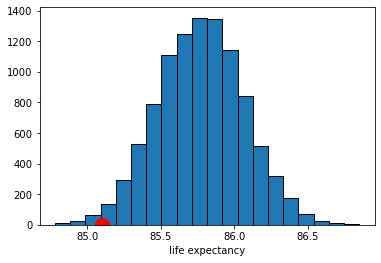

In [8]:
plots.hist(sample_averages, bins=20, ec='black')
plots.xlabel("life expectancy")
plots.scatter(observed_statistic, 0, color='red', s=200, zorder=2);
plots.show()

So far so good.  It looks like the observed statistic (85.09 years) overlaps a little with the distribution of the statistic under the null.  How much overlap is there?  We can answer that directly by calculating the proportion of samples that had a mean higher (or lower) than the observed statistic.  This is:

In [9]:
np.count_nonzero( sample_averages <=  
                 np.asarray(district_averages.loc['midtown'] ) )  / repetitions

0.0102

Here, we are asking for the count of the sample averages that are less than or equal to (`<=`) the Midtown average, and then dividing out by the number of samples (the `repetitions`) to make it a proportion.  Ultimately it is `0.0102` (this may vary a little if you use a different seed above).

## p-values
We know that around 1.02% of all the random draws were *less than or equal to* our observed (test) statistic of 85.09 years.  Put otherwise: if we drew a random sample of size 36 from our population, the probability that the mean of that sample would be less than or equal to the Midtown mean is 0.0102.

More formally: *if* the null hypothesis is correct (recall: Midtown not lower), the probability of observing a value for the test statistic (the mean of the random samples) as small or smaller than the observed statistic we saw in the data (85.09) is 0.0102.  This number is our **p-value**.  This tells us 

> the probability of observing test results like the ones we saw, *given the null is true*

In general, this number is very small, it implies that we were very unlikely to see data like we saw under the null hypothesis. 

For our application, if the p-value is very small, it implies that we were very unlikely to see a life expectancy for Midtown as low as the one we saw (the actual data) if, in fact, Midtown does not have a lower life expectancy than the rest of the Manhattan (the null hypothesis).  

What does it mean for a p-value to be "very small"?  Historically, people used cut-offs of 0.01 or 0.05---the latter being very common.  If the p-value for a test is less than the cut-off, we say the result is **statistically significant**.  In more casual language, if a result is *statistically significant* it is very unlikely to have occurred just be chance (e.g. we just drew an unusual sample).


What about here?  Our p-value was 0.0102.  That is lower than 0.05, so... 
- we could say that the mean life expectancy in Midtown is statistically significantly lower than that of Manhattan at the 0.05 level (or 5% level).  
- we could also say that we reject the null hypothesis that Midtown does not have lower life expectancy at the 0.05 level.

But 0.0102 is larger than 0.01, so...
- we might say that the mean life expectancy in Midtown is not statistically significantly lower than that of Manhattan at the 0.01 level (or 1% level).
- we fail to reject the null hypothesis that Midtown does not have lower life expectancy at the 0.01 level.

In theory, a researcher is meant to select their proposed cut-off value for the test *in advance* (it is called 'alpha' or $\alpha$).  And then, once the p-value is calculated, the researcher should make a binary (yes/no) decision:
- if the p-value is larger than the $\alpha$ value, the result is *not* statistically significant, and we fail to reject the null.
- if the p-value is smaller than the $\alpha$ value, the result *is* statistically, and we reject the null hypothesis.

In practice, many researchers don't state their $\alpha$ value in advance, and instead just report whether something is significant, and at what level.  As a general rule, it is good to present your p-values, even if you want to use cut-offs (after the test is done).


### What p-values are not
For what it is worth, there is considerable confusion about p-values, so here are some things p-values are *not*:
- they are *not* the probability that the null hypothesis is true: they come from a calculation that it *conditioned* on the null being true
- they are *not* the strength of evidence for the null or the alternative: results are either statistically significant or they are not---we don't 'score' results via the p-value




## Two-tailed tests
In our example above, we were interested in the idea that Midtown had (potentially statistically significantly) *lower* life expectancies than the rest of Manhattan.  We can write this in terms of a null ($H_0$ and alternative ($H_1$) hypothesis:  
- $H_0$: life expectancy of Midtown $\geq$ life expectancy of Manhattan
- $H_1$: life expectancy of Midtown $<$ life expectancy of Manhattan

This is a *directional* hypothesis, in that we are asserting that the life expectancy of our particular area of interest (Midtown) is larger or smaller (here, smaller) than some other value (here, Manhattan).  This lead to a **one-tailed** test, in that we only looked at the proportion of random sample means on one side (one tail) of the null hypothesis distribution.

But we could have asked a more general question:

> is the life expectancy of Midtown *different* to that of Manhattan (not simply "lower")?  

This implies: 
- $H_0$: life expectancy of Midtown $=$ life expectancy of Manhattan
- $H_1$: life expectancy of Midtown $\neq$ life expectancy of Manhattan

To reiterate, our *alternative* hypothesis is that Midtown's life expectancy does not equal that of Manhattan.  There are two ways that can happen: 
- Midtown has a lower average life expectancy.
- Midtown has a *higher* average life expectancy.

Above, we checked the evidence for the first of these, and just implicitly assumed the second was not possible. Now we want to check it explicitly.  To see the intuition, let's return to the idea of an $\alpha$ value we met earlier. We said that we set this threshold in advance.  Suppose we set it at 0.05 (which is a common choice).  In that case, if we were redoing our analysis above, we would have said that Midtown life expectancy was statistically significantly lower had 0.05 (or 5%) of the randomly drawn means appeared *below* that point.  

Suppose instead that we had an (alternative) hypothesis that the Midtown life expectancy was *higher* than the average for Manhattan. In that case, we would have said that Midtown life expectancy was statistically significantly *higher* had 0.05 (or 5%) of the randomly drawn means appeared *above* that point.  

For a two-tailed test, we are asking about *both* of these possibilities. But if $\alpha$ is fixed in advance at 0.05, it cannot be 0.05 in *both* tails because that would add up to 0.10...and we said $\alpha$ was 0.05.  It has to be 0.05 for both tails *combined*---and that means we have a 0.025 "zone" in each tail.  What does this mean?  An immediate consequence is obviously that, for us to declare something "statistically significant", it must be a 'bigger' result than for our one-tailed test.  In that case, if we found that, say, 0.049 of the draws (so 4.9%) were lower than our observed statistic, we could declare that Midtown was statistically significantly lower (at the 5% level) and we were done.  But that won't work now: if only 0.049 of the random draw means have values lower than our observed statistic, this won't be lower than 0.025, and the result won't be statistically significant.

So, what's the rule? How do we convert a one-tailed p-value to a two-tailed one?  In this case, *we just double it*.  This is equivalent to imposing the more stringent 0.025 cutoff for a given one-tailed test.  For us then, our p-value for this two-tailed test is $0.0102 \times 2 = 0.0204$.  This is still statistically significant at the 0.05 level (and not at the 0.01 level), but obviously it is larger.

Some important notes on this process: 
- While doubling the p-value worked here, this is not actually the *general* rule, which depends on how the initial one-tail test was set up.  And indeed, it also depends on some specifics about the nature of the test statistic.  But we will keep things simple in this course, and present examples where the doubling rule works.
- Obviously, two-tailed tests are more conservative than one-tailed tests.  By this we mean that, for a given $\alpha$, a two tailed test is mechanically less likely to return a p-value below the cutoff. There may be good *theoretical* reasons to use one-tailed tests (e.g. when the hypothesis is directional), but this point still stands.
- For some techniques---like linear regression which we will meet later---we essentially always present two tailed tests (only)
- In general in this course, we will use large samples.  This doesn't mean that the difference between a one-tailed and two-tailed test will be zero, but it should mean that for most problems the distinction won't meaningfully matter for us.

